In [2]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [3]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [5]:
# copy demo into current directory
ac.copydemo('ph1')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Compute stationary solutions***")
sa = ac.run(e='ph1',c='ph1.ss',runner=runner)

print("\n***Compute periodic solutions***")
for hb in sa('HB'):
    sa = sa + ac.run(hb,c='ph1.ps',runner=runner)

print("\n***Relabel and save the sa output files***")
sa = ac.relabel(sa)
ac.save(sa, 'sa')

print("\n***Phase shift of Solution 6 in s.sa***")
ph1 = ac.run(sa(6),c='ph1',runner=runner)
ph1 = ac.relabel(ph1)
ac.save(ph1, 'ph1')

Copying demo ph1 ... done

***Compute stationary solutions***
gfortran -fopenmp -O -c ph1.f90 -o ph1.o
gfortran -fopenmp -O ph1.o -o ph1.exe /auto/lib/*.o
Starting ph1 ...

  BR    PT  TY  LAB    PAR(4)        L2-NORM         U(1)          U(2)     
   1     1  EP    1   2.02163E+00   1.83543E+02   4.55597E+01   1.77799E+02
   1    38  HB    2   3.49995E+00   9.40760E+01   2.79647E+01   8.98235E+01
   1    48  HB    3   4.65046E+00   6.57556E+01   2.23669E+01   6.18346E+01
   1    54  UZ    4   6.00000E+00   4.85751E+01   1.89456E+01   4.47281E+01

 Total Time    0.571E-01
ph1 ... done

***Compute periodic solutions***
Starting ph1 ...

  BR    PT  TY  LAB    PAR(4)        L2-NORM       MAX U(1)      MAX U(2)       PERIOD    
   2    84  LP    5   2.75969E+00   1.20187E+02   5.36715E+01   1.44949E+02   1.00064E+01
   2   250  UZ    6   4.00000E+00   7.92438E+01   4.10342E+01   9.51583E+01   6.73966E+00

 Total Time    0.774E+00
ph1 ... done
Starting ph1 ...

  BR    PT  TY  LAB    PAR(

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   3    52  LP    5   5.00784E+00   6.02713E+01   3.19401E+01   6.89478E+01   5.67658E+00
   3    83  UZ    6   4.00000E+00   7.92438E+01   4.10181E+01   9.51516E+01   6.73966E+00

 Total Time    0.161E+00
ph1 ... done

***Relabel and save the sa output files***
Relabeling done
Saving to b.sa, s.sa, and d.sa ... done

***Phase shift of Solution 6 in s.sa***
Starting ph1 ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      PAR(9)     


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   2    15        9   6.73966E+00   7.92438E+01   4.10234E+01   9.51236E+01   4.10234E+01
   2    30       10   6.73966E+00   7.92438E+01   4.10269E+01   9.51582E+01   4.03561E+01
   2    45       11   6.73966E+00   7.92438E+01   4.10471E+01   9.51517E+01   3.86051E+01
   2    60       12   6.73966E+00   7.92438E+01   4.10443E+01   9.51397E+01   3.55966E+01
   2    75       13   6.73966E+00   7.92438E+01   4.10407E+01   9.51316E+01   3.11893E+01
   2    79  UZ   14   6.73966E+00   7.92438E+01   4.10457E+01   9.51198E+01   3.00000E+01

 Total Time    0.207E+00
ph1 ... done
Relabeling done
Saving to b.ph1, s.ph1, and d.ph1 ... done


Created plot


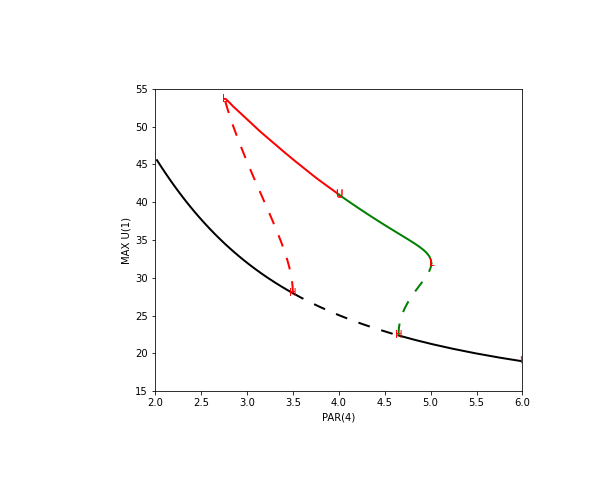

In [6]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('sa')
p.config(stability=True, grid=False)
p.config(bifurcation_y='MAX U(1)')
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


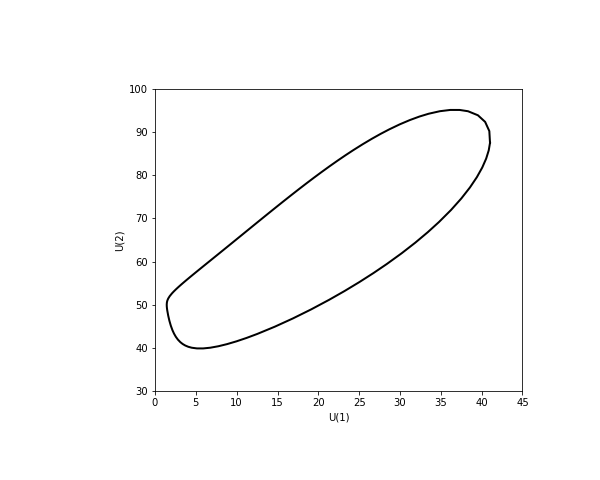

In [14]:
# plot periodic solution after phase shifting
# plot shows U(2) vs U(1)

p = ac.plot('ph1')
p.config(type='solution', grid=False)
p.config(solution_x='U(1)')
p.config(solution_y='U(2)')
p.savefig('b.png')
display(Image.open('b.png'))

In [15]:
# clean up files

ac.clean()
ac.delete('sa')
ac.delete('ph1')

Deleting fort.* *.o *.exe *.*~ ... done
